## ZARA SALES DATA ANALYSIS 


# =============================================
# File          : 00_data_cleaning_pandas.py
# Project       : Zara Sales Analysis
# Author        : Jhalak Saxena
# Description   : Pre-SQL data cleaning using pandas (deduplication + outlier removal)
# Input         : zara_sales.csv
# Last Updated  : 2025-07-09
# =============================================


In [2]:
#IMPORTING DEPENDENCIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Reading and loading the FILE 

df = pd.read_csv("zara.csv")

In [4]:
# Understanding the data
print(df.shape)
print(df.columns)
  

(252, 1)
Index(['Product ID;Product Position;Promotion;Product Category;Seasonal;Sales Volume;brand;url;sku;name;description;price;currency;scraped_at;terms;section'], dtype='object')


Since it is not seperated into  columns , we have to remove the delimiter and convert it to columns and rows


In [5]:
#Splitting header into individual column
df = pd.read_csv("Zara.csv", sep =";")  

#checking shape again
df.info()
df.shape
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Product Category  252 non-null    object 
 4   Seasonal          252 non-null    object 
 5   Sales Volume      252 non-null    int64  
 6   brand             252 non-null    object 
 7   url               252 non-null    object 
 8   sku               252 non-null    object 
 9   name              251 non-null    object 
 10  description       250 non-null    object 
 11  price             252 non-null    float64
 12  currency          252 non-null    object 
 13  scraped_at        252 non-null    object 
 14  terms             252 non-null    object 
 15  section           252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

,Product ID,Sales Volume,price
count,252.000000,252.000000,252.000000
mean,153370.503968,1823.702381,86.252540
std,26160.444549,697.703748,52.083205
min,110075.000000,529.000000,7.990000
25%,131053.750000,1243.000000,49.900000
50%,151681.500000,1839.500000,79.900000
75%,175669.750000,2398.750000,109.000000
max,199631.000000,2989.000000,439.000000


In [6]:
# Checking for the null values 
df.isnull().sum()

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
sku                 0
name                1
description         2
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64

In [7]:
#dropping nulls 
df.dropna(inplace=True)

#checking nulls again
df.isnull().sum()

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
sku                 0
name                0
description         0
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64

In [8]:
# check for duplicates 
df.duplicated().sum()
# No duplicates found 

np.int64(0)

In [14]:
#Renaming new column
df.rename(columns = {'terms': 'Type'} , inplace = True)
df.rename(columns = {'section': 'Gender'} , inplace = True)
df.rename(columns = {'name': 'product_name'} , inplace = True)
df.columns = [col.title() for col in df.columns] # to capitalise 1st letter

C:\Users\DELL\AppData\Local\Temp\ipykernel_16092\790886247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'terms': 'Type'} , inplace = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16092\790886247.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'section': 'Gender'} , inplace = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16092\790886247.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

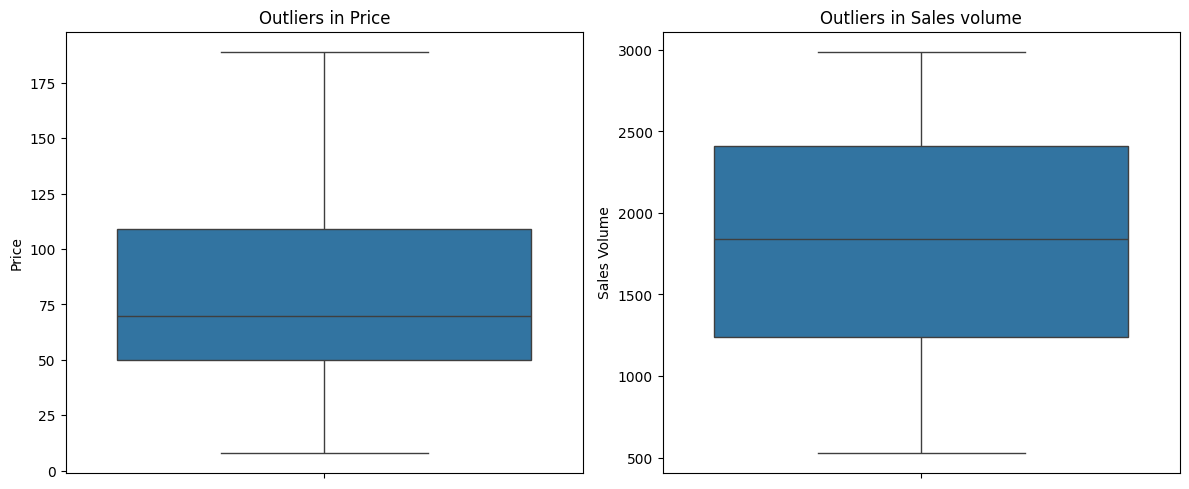

In [17]:
# Detecting outliners 

plt.figure(figsize=(12, 5))

# Boxplot for Price
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Price'])
plt.title('Outliers in Price')

# Boxplot for Quantity
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Sales Volume'])
plt.title('Outliers in Sales volume')

plt.tight_layout()
plt.show()



Detect and remover the outliners

In [16]:
# FIXING outliners in price 

original_shape = df.shape

# Calculating IQR for price
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Seting the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

# Printing shape comparison
print("Original Data Shape:", original_shape)
print("After Removing Price Outliers:", df.shape)




Original Data Shape: (247, 16)
After Removing Price Outliers: (247, 16)


In [ ]:
# creating new column
df['Total_Revenue'] = df['Price'] * df['Sales Volume']


C:\Users\DELL\AppData\Local\Temp\ipykernel_5316\933707256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Revenue'] = df['Price'] * df['Sales Volume']


Now saving the cleaned csv 


In [ ]:
df.to_csv('zara_cleaned.csv', index=False)


Connecting To sql server for further analysis 



In [ ]:
from sqlalchemy import create_engine
server = 'DESKTOP-SNAA16T\\SQLEXPRESS'
database = 'ZaraDB' 

connection_string = f"mssql+pyodbc://@{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server"
engine = create_engine(connection_string)



In [ ]:
df.to_sql('zara_sales', con=engine, if_exists='replace', index=False)


1